<center><img src=https://github.com/komisarzGiT/gai/blob/main/GU_Python/course/img/MScAI_brand.png?raw=1 width=70%></center>

# Regressing by Guessing

In this notebook we'll implement an approach to **regression** based on **guessing**. This will introduce the most important ideas in `numpy`, `matplotlib`, and `pandas` - core libraries for scientific computing.

Let's pretend we have carried out some scientific experiment, eg in microbiology. There's some chemical compound and we think that a certain type of cell grows faster or slower depending on the concentration of that compound. We've measured the concentration ($x$) and the resulting growth ($y$) and stored the results in a `.csv` file.

Now we want to find out: how are $x$ and $y$ related? Let's plot the data and try to find a function $f$ such that $f(x) = y$, at least approximately.

In [1]:
# standard imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Reading data with Pandas

Our data is stored in this `.csv`.

In [12]:
from google.colab import drive
drive.mount('/content/drive')

# G:\My Drive\GAI\GU_Python\course\data
# !ls /content/drive/MyDrive/GAI/GU_Python/course/data/

filename = "/content/drive/MyDrive/GAI/GU_Python/course/data/cell_growth.csv"

Mounted at /content/drive


First let's take a look at the format. (You can also load into a text editor.)

Below, `!` is Jupyter magic, not Python. `cat` means "print" in Unix. `$` means "value of" `filename`.

In [13]:
!cat $filename

x,y
8.73,5.76
6.15,2.48
2.76,5.56
1.89,5.16
8.76,5.85
1.64,4.84
7.03,2.41
1.41,4.44
9.07,7.17
9.88,11.81
5.01,3.54
0.45,1.54
2.97,5.51
1.36,4.33
0.38,1.26
6.30,2.41
7.82,3.27
7.37,2.66
1.70,4.92
6.20,2.46


It seems to be a `.csv` of two columns, with headers. This is easy to read in Pandas as follows.

In [14]:
df = pd.read_csv(filename)

(If the format was different, `read_csv` has many options to control how we read the data.)

Let's confirm the column names and see if it was read in correctly:

In [15]:
df.columns

Index(['x', 'y'], dtype='object')

In [16]:
df.head() # see the first few rows

,x,y
0,8.73,5.76
1,6.15,2.48
2,2.76,5.56
3,1.89,5.16
4,8.76,5.85


A DataFrame has a shape like the following (a `tuple` of `int`s indicating 20 rows, 2 columns):

In [17]:
!python --version
!cat /etc/*release
df.shape

Python 3.12.11
DISTRIB_ID=Ubuntu
DISTRIB_RELEASE=22.04
DISTRIB_CODENAME=jammy
DISTRIB_DESCRIPTION="Ubuntu 22.04.4 LTS"
PRETTY_NAME="Ubuntu 22.04.4 LTS"
NAME="Ubuntu"
VERSION_ID="22.04"
VERSION="22.04.4 LTS (Jammy Jellyfish)"
VERSION_CODENAME=jammy
ID=ubuntu
ID_LIKE=debian
HOME_URL="https://www.ubuntu.com/"
SUPPORT_URL="https://help.ubuntu.com/"
BUG_REPORT_URL="https://bugs.launchpad.net/ubuntu/"
PRIVACY_POLICY_URL="https://www.ubuntu.com/legal/terms-and-policies/privacy-policy"
UBUNTU_CODENAME=jammy


(20, 2)

In [18]:
type(df)

pandas.core.frame.DataFrame

The object `df` is a Pandas **DataFrame**. Think of it like a `dict` of columns (`name: column`). (Or like an Excel file!)

So, we can access the columns like this:

In [30]:
x = df['x']
y = df['y']

#mabyra - dict of columns
# my_dictionary = {
#     "key1": "value_a",
#     "key2": 100,
#     "key3": [1, 2, 3]
# }



In [ ]:
type(x)

pandas.core.series.Series

The object referred to by pandas.core.series.Series is the core Pandas Series data structure.

A Pandas Series is a one-dimensional labeled array capable of holding data of any type (e.g., integers, floats, strings, Python objects).

**It has two main components**:

Data (Values): The actual content stored in the Series, similar to a NumPy
array.

Index (Labels): A set of labels (or names) associated with each data point, allowing for flexible and efficient access and manipulation. If no index is explicitly provided, Pandas defaults to an integer index starting from 0.

**Key Characteristics and Context** \
One-Dimensional: A Series represents a single column of data.

Building Block for DataFrames: A Pandas DataFrame (the two-dimensional table-like structure) is essentially a collection of multiple Series objects, where each column of the DataFrame is a Series.

Enhanced NumPy Array: **It is similar to a NumPy array but with the crucial addition of the explicit, labeled index,** which supports operations like automatic data alignment during arithmetic operations between two Series.

Data Type: A Series generally holds data of a single, homogenous data type, which is typically a NumPy data type.

You usually create or interact with this object using the simplified alias pd.Series() after importing the library:
```python
import pandas as pd
#Creates a Series with data [10, 20, 30] and default integer index [0, 1, 2]
my_series = pd.Series([10, 20, 30])
print(type(my_series))
#Output: <class 'pandas.core.series.Series'>
print(my_series)
#Output
# 0    10
# 1    20
# 2    30
# dtype: int64
```

The long-form pandas.core.series.Series simply indicates the precise location of the class definition within the Pandas library's internal structure.

Each column is a Pandas **Series**, which is like a list of values, but they must all be of the same type (`dtype`):

In [40]:
x.dtype

dtype('float64')

In fact, a **Series** is almost exactly the same as a 1D Numpy **array**, which we'll see shortly. They can be used interchangeably.

### Plotting data with `Matplotlib`

Let's visualise the data by making a **scatterplot** using `Matplotlib`. We can pass in lists, Numpy arrays, Pandas Series...

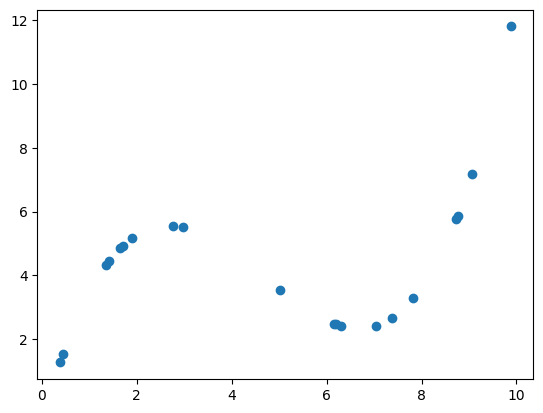

In [45]:
plt.scatter(x, y)

That looks good. A plot made by `Matplotlib` appears directly in Jupyter Notebook.

But notice that ugly `<matplotlib.collections.PathCollection at 0x1b6335f2358>`. That's because `plt.scatter` also returns an object which we don't really care about. In Jupyter, the value of the last expression in a cell is always printed.

Let's remove that ugly text. We introduce the semi-colon `;` which can be used to put multiple expressions on the same line:

In [46]:
2 * 3; 2 * 4

8

No-one **ever** uses a semi-colon except in the following `Matplotlib`/Jupyter Notebook hack.

We add a semi-colon after `plt.scatter`, which means there is now an **empty expression** after it. It has no value, so nothing is printed.

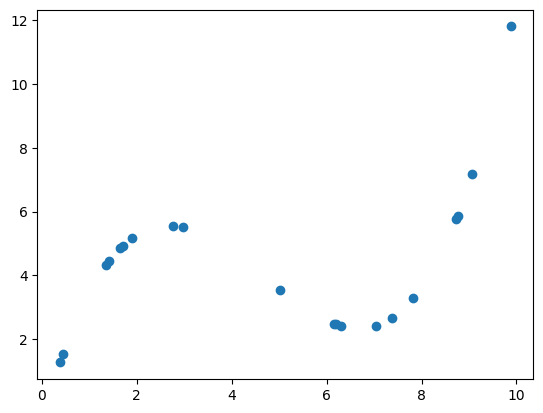

In [ ]:
plt.scatter(x, y);

In all of the plots below, we'll use this semi-colon trick on the last line.

Now, I notice that the $y$-axis doesn't start at zero.

I can control the lower and upper bounds for both axes like this:

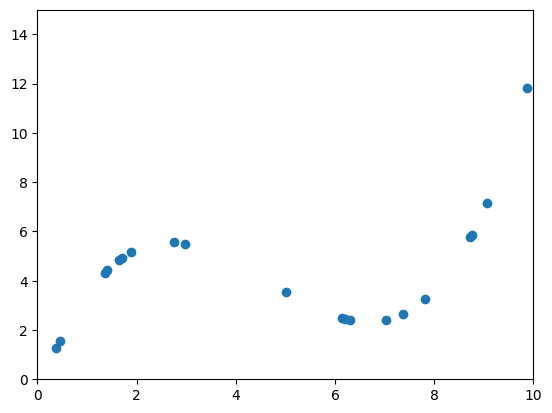

In [51]:
plt.scatter(x, y)
plt.xlim((0, 10))
plt.ylim((0, 15));

And of course, we should **always** label our axes:

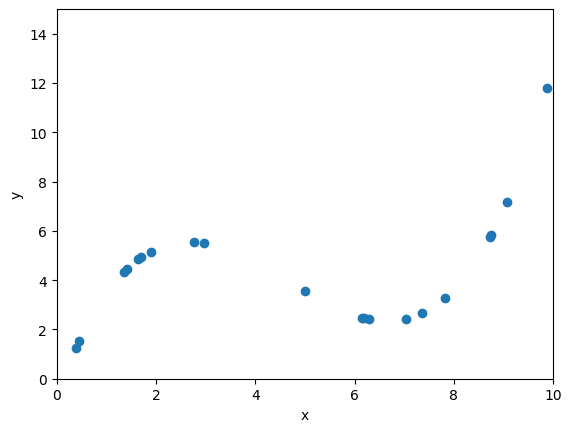

In [52]:
plt.scatter(x, y)
plt.xlim((0, 10))
plt.ylim((0, 15))
plt.xlabel("x")
plt.ylabel("y");

However, perhaps we'd like to make them look a little nicer. Axis labels are often mathematical, so we can use LaTeX to format them. The `$` symbols are interpreted by `Matplotlib` as LaTeX math delimiters. And because we often use a backslash `\` to introduce special characters in LaTeX, it's useful to use a Python **raw string** (`r`-string) which doesn't itself interpret `\` characters as special.

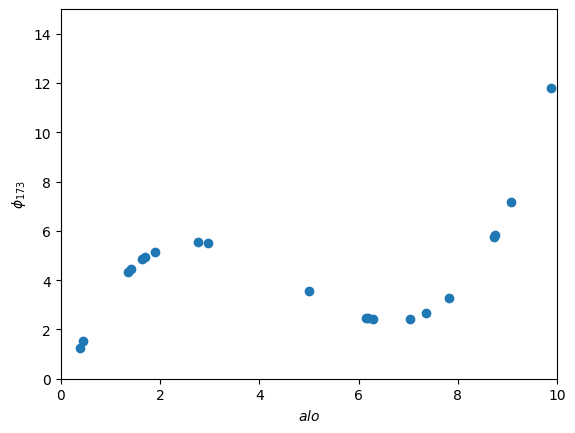

In [59]:
plt.scatter(x, y)
plt.xlim((0, 10))
plt.ylim((0, 15))
plt.xlabel(r"$x$")
plt.ylabel(r"$\phi_{173}$"); # some nonsense formula to illustrate

### Function fitting (wild guessing, Numpy, and more plotting)

Next, let's guess: **what function $f$ relates $y$ to $x$, ie y = f(x)?** I don't have a clue, so let's try:

In [61]:
def f_guess(x):
    return 3 * np.log(0.5 * x + 1)

Now the above function looks innocent. We can run it as you might expect:

In [62]:
f_guess(4.3)

np.float64(3.442207358512625)

And if we need to run it many times, we can:

In [63]:
for xi in x:
    print(f"{xi:.2f} {f_guess(xi):.2f}") #The colon (:) introduces the format specifier, a Format Specification Mini-Language that tells Python how to present the variable's value

8.73 5.04
6.15 4.21
2.76 2.60
1.89 2.00
8.76 5.05
1.64 1.80
7.03 4.52
1.41 1.60
9.07 5.13
9.88 5.35
5.01 3.76
0.45 0.61
2.97 2.73
1.36 1.56
0.38 0.52
6.30 4.27
7.82 4.77
7.37 4.63
1.70 1.85
6.20 4.23


However, with Numpy a function like this is **vectorised**. If the argument is an `array`, all the calls (like `np.log`) and operators (like `*` and `+`) take `array` inputs and return `array` outputs.

They work by looping in underlying C or Fortran code, so it's much faster than looping in Python as above.

Remember: someone has to write loops, but it doesn't have to be you.

In [ ]:
z = np.array([0.0, 1.0, 2.0]) # make an array from a list

This is our first encounter with a true Numpy array, the most central object in the Python numerical ecosystem.

In [ ]:
type(z)

numpy.ndarray

In an `array`, just like in a Pandas column, all values have the same type, called `dtype`:

In [ ]:
z.dtype

dtype('float64')

Numpy `array`s have a *shape* (same concept as a Pandas DataFrame shape), which is just a tuple of `int`s. A 1D array like this only has a single value:

In [ ]:
z.shape

(3,)

So, we can calculate the value of `f_guess` on all of `x`:

In [ ]:
f_guess(x)

0     5.039689
1     4.214612
2     2.601301
3     1.995786
4     5.048065
5     1.796510
6     4.522216
7     1.600695
8     5.133275
9     5.345127
10    3.762572
11    0.608823
12    2.730818
13    1.556381
14    0.521860
15    4.269325
16    4.773822
17    4.633098
18    1.845557
19    4.232961
Name: x, dtype: float64

We can plot both the true data and our guesses on the same plot. Look carefully at the two `plt.scatter` calls. Notice they have the same `x`. It is only our guesses for the $y$-value at each $x$ which differ.

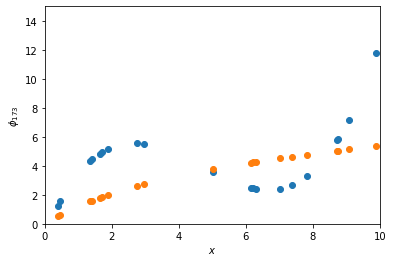

In [ ]:
plt.scatter(x, y)
plt.scatter(x, f_guess(x))
plt.xlim((0, 10))
plt.ylim((0, 15))
plt.xlabel(r"$x$")
plt.ylabel(r"$\phi_{173}$");

`Matplotlib` automatically introduces nice colours. But this will still be confusing. Which is which? We can use labels and a legend. Notice we pass in a `label` to each `scatter` call, and then the `legend` will use them.

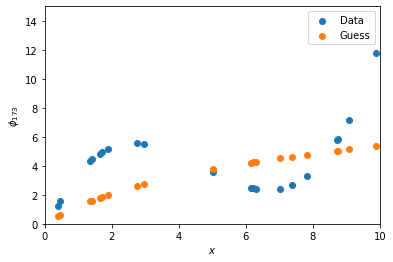

In [ ]:
plt.scatter(x, y, label="Data")
plt.scatter(x, f_guess(x), label="Guess")
plt.xlim((0, 10)); plt.ylim((0, 15))
plt.xlabel(r"$x$"); plt.ylabel(r"$\phi_{173}$") # ok, I lied
plt.legend();

Above, we are looking at the guessed $y$ values for each $x$. But since we have a **function** `f_guess`, we can do better.

We plot the entire function, not just points. We do this by **sampling** $x$ on a grid using `linspace`:

In [ ]:
# start at 0, go to 10, give 101 evenly-spaced points, including 10 itself
xgrid = np.linspace(0, 10, 101, endpoint=True)
xgrid

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. ])

The following again applies our function `f_guess` to a Numpy `array`, and the result is an `array`.

In [ ]:
y_guess_grid = f_guess(xgrid)

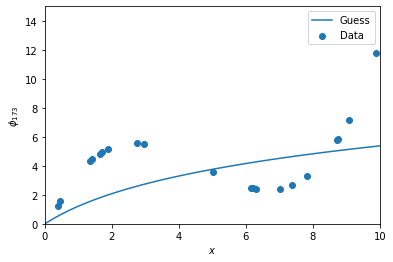

In [ ]:
plt.scatter(x, y, label="Data")
plt.plot(xgrid, y_guess_grid, label="Guess")
plt.xlim((0, 10)); plt.ylim((0, 15))
plt.xlabel(r"$x$"); plt.ylabel(r"$\phi_{173}$")
plt.legend();

That's nice - we can really see the shape of `f_guess` now. But the colour disappeared!

We can control colour directly using `c` as below. There are several ways of specifying colours and styles but let's use the simplest, a colour string:

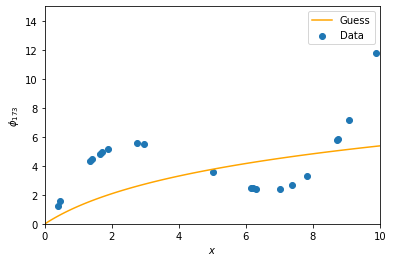

In [ ]:
plt.scatter(x, y, label="Data")
plt.plot(xgrid, y_guess_grid, c="orange", label="Guess")
plt.xlim((0, 10)); plt.ylim((0, 15))
plt.xlabel(r"$x$"); plt.ylabel(r"$\phi_{173}$")
plt.legend();

Now it's obvious our guess was not very good! Let's try another guess.

In [ ]:
def f_guess2(x): return 1.3 ** x
y_guess2_grid = f_guess2(xgrid)

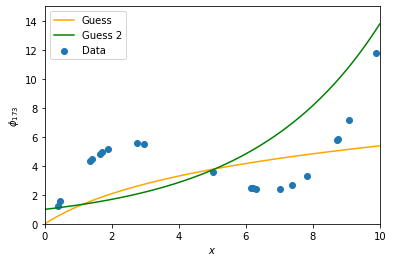

In [ ]:
plt.scatter(x, y, label="Data")
plt.plot(xgrid, y_guess_grid, c="orange", label="Guess")
plt.plot(xgrid, y_guess2_grid, c="green", label="Guess 2")
plt.xlim((0, 10)); plt.ylim((0, 15))
plt.xlabel(r"$x$"); plt.ylabel(r"$\phi_{173}$")
plt.legend();

Is `f_guess2` better? It's hard to say. But of course we can measure it.

### Measuring regression performance

There are two main ways of measuring how well a guess matches true data:

* Root mean-squared error RMSE
* Correlation - usually the squared correlation $R^2$

$$\mathrm{RMSE}(a, b) = \sqrt{\frac{\sum_{i=1}^n (a_i - b_i)^2}{n}}$$

Here $a$ and $b$ are vectors (lists of numbers), so $a_i - b_i$ is the error at point $i$

We use RMSE by passing in the true $y$ and the guess $f(x)$. Let's define it in code and try it.

In [ ]:
def rmse(a, b):
    return np.sqrt(np.mean((a - b)**2))

In [ ]:
rmse(f_guess(x), y)

2.5470699888588686

In [ ]:
rmse(f_guess2(x), y)

3.161768844002654

It looks like `f_guess` is slightly better (smaller RMSE => smaller errors => better). But still, both are quite bad!

Notice that here we are calling `f_guess(x)`, not `f_guess(xgrid)`, because we only want to compare the guesses against the true, known `y`.

Another common method of comparing is to use squared correlation $R^2$, sometimes called the **coefficient of determination**. We can use the Numpy `corrcoef` function for this:

In [ ]:
c = np.corrcoef(f_guess(x), y)
print(c.shape)
c

(2, 2)


array([[1.        , 0.34645592],
       [0.34645592, 1.        ]])

If we pass it $n$ vectors it returns an $n \times n$ `array` giving all possible correlation coefficients. The correlation between any vector and itself is 1, so we have 1 on the diagonal. And the correlation of $a$ and $b$ is the same as the correlation of $b$ and $a$, so the `array` is symmetric, as we see above.

But we only need the off-diagonal term here. How can we access it?

We need an important new piece of syntax: given any Numpy array with 2 or more dimensions, we can pass a **tuple** as the index!

In [ ]:
A = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
A[2, 1] # here (2, 1) is a tuple

8

### Tangent: fancy indexing/slicing

You can probably guess what happens when we use only one index, or introduce slice notation as well, eg:

In [ ]:
A[0] # 0th row

array([1, 2, 3])

In [ ]:
A[1:3] # rows from 1 to 3 (excluding 3)

array([[4, 5, 6],
       [7, 8, 9]])

In [ ]:
A[0:3, 0] # rows from 0 to 3 (excl 3), column 0

array([1, 4, 7])

In [ ]:
A[:, 0] # rows from start to end, column 0

array([1, 4, 7])

Anyway, with the tuple notation, we can define $R^2$ as follows.

In [ ]:
def rsquared(a, b):
    M = np.corrcoef(a, b)
    R = M[0, 1]
    return R**2

In [ ]:
rsquared(f_guess(x), y)

0.12003170424651236

In [ ]:
rsquared(f_guess2(x), y)

0.2980174153919696

Now, remember **smaller RMSE is better**, but **larger $R^2$ is better**. So, now it seems `f_guess2` is better!

`f_guess` is a bit more conservative in its guesses, and gives smaller RMSE. But `f_guess2` perhaps matches the **shape** a bit better, giving worse (larger) errors but also better (larger) $R^2$.

So which is more important - RMSE or $R^2$? It depends on the application. But that's beyond our scope now.

### A more careful experiment

Let's define a few more guesses, and give them informative names.

In [ ]:
def xsq(x): return x**2
def xcub(x): return x**3
def logx1(x): return np.log(x+1)
def my_weird_fn(x): return 0.1 * np.exp(0.5 * x)

Now a very important principle: in a proper experiment there should be no copy-pasting, and no manual re-running cells! These are sources of errors. Instead, put all the things we want to test into a `dict` or `list` and loop over them. Ideally the whole experiment should be wrapped up to be run in a single click.

In [ ]:
guesses = [f_guess, f_guess2, xsq, xcub, logx1, my_weird_fn]

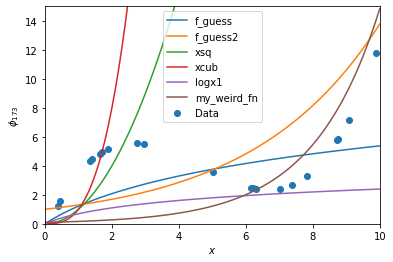

In [ ]:
plt.scatter(x, y, label="Data")
for guess in guesses: # loop to plot multiple guesses
    plt.plot(xgrid, guess(xgrid), label=guess.__name__)
plt.xlim((0, 10)); plt.ylim((0, 15)) # ok, I lied
plt.xlabel(r"$x$"); plt.ylabel(r"$\phi_{173}$")
plt.legend();

Maybe you can do a bit better - try defining a few more functions to replace those above. Try different functions, polynomials, different constants, anything you like.

### Saving results

Now, we've done a nice experiment. We've identified a function which seems to fit the data (hopefully).

We need a plot suitable for inclusion in the paper we're going to submit to **Nature**.

In `Matplotlib` the image format is controlled by the filename suffix. Use `.pdf` for diagrams and plots, not `.jpg`, not `.png`.

(Use `.jpg` only for photos, and `.png` only for screenshots, or if saving a plot for the web.)

In [ ]:
img_filename = "data/cell_growth.pdf"

In [ ]:
plt.savefig(img_filename)
plt.close() # when dealing with multiple plots, avoid over-plotting using close

We'll also need a table of RMSE and $R^2$ results for publication. Let's make it in Pandas. We start by storing each row of results in a list.

In [ ]:
results = []
for guess in guesses:
    guess_y = guess(x)
    result = (guess.__name__, rmse(y, guess_y), rsquared(y, guess_y))
    results.append(result)

In [ ]:
results_df = pd.DataFrame(results, columns=('fn_name', 'rmse', 'rsquared'))

In [ ]:
results_df

,fn_name,rmse,rsquared
0,f_guess,2.547070,0.120032
1,f_guess2,3.161769,0.298017
2,xsq,42.225042,0.224947
3,xcub,388.647031,0.329021
4,logx1,3.548263,0.122482
5,my_weird_fn,3.061098,0.467703


Let's write that table to disk also.

In [ ]:
results_filename = "data/cell_growth_results.csv"
results_df.to_csv(results_filename, index=False) # don't write an index column

In [ ]:
!cat $results_filename

fn_name,rmse,rsquared
f_guess,2.5470699888588686,0.12003170424651236
f_guess2,3.161768844002654,0.2980174153919696
xsq,42.22504191383356,0.22494680958583232
xcub,388.6470314039689,0.32902140713756195
logx1,3.54826331245571,0.12248168559184852
my_weird_fn,3.0610980562078383,0.4677030383134019


### Going further

Now we're finished. You might be wondering: why did we have to guess this manually?

* We can use Linear Regression to fit a straight line to data
* If we know a non-linear function but not the right constants, we can use Non-linear Least Squares to fit
* If we don't even know what non-linear function to use, we can consider eg Genetic Programming!

Please see Vanderplas **Python Data Science Handbook**, available for free online, as a reference for Numpy, Pandas, Matplotlib, Seaborn, Scikit-Learn.

### Summary: `Matplotlib`

* `import matplotlib.pyplot as plt`
* `plt.plot` for a lineplot
* `plt.scatter` for a scatterplot
* `plt.xlim`, `plt.ylim` to control axis ranges
* `plt.xlabel`, `plt.ylabel` to give axis labels
* `r'$\phi_{173}$'` - use LaTeX maths formatting in axis labels
* `label=` inside `plot` or `scatter` to pass labels, then `plt.legend` to use them
* Use semi-colon `;` on last line to remove ugly output
  

### Summary: Numpy

* `import numpy as np`
* Central object is the **array**
* `x = np.array([1.0, 2.0, 3.0])` to create a 1D `float` array from a list
* `M = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])` to create a 2D `int` array from a list of lists
* `np.linspace(0, 10, 101, endpoint=True)` to generate a 1D grid
* **Vectorised functions**: eg `np.log(x)` where `x` is an array, returns an array
* Overloaded Python operators also vectorised, eg `(a-b)**2`

### Summary: Numpy (2)

* `np.random.uniform()` to generate uniform random numbers
* `np.random.randn()` for normally-distributed numbers
* `np.corrcoef` for correlation coefficient
* `np.load`, `np.save` to load/save in `.npy` format
* `np.genfromtxt`, `np.savetxt` to load/save in text format

### Summary: Pandas

* `import pandas as pd`
* Central object is the **DataFrame**
* `pd.read_csv`, `df.to_csv` for load/save csv
* `df.head()` for a quick look
* `df = pd.DataFrame(results)` to convert a list of rows to `DataFrame`
* **A DataFrame is like a dictionary, name: column**
* Therefore, access is like a `dict`: `df['x']`